# 1. Obtaining data from the Internet

### First, navigate to the IPUMS USA website: https://usa.ipums.org/usa/index.shtml.

Today, the dataset has been obtained for you. But you will get experience searching and downloading data from IPUMS in the Mini Project 1 (part 2). 

In [8]:
# Import required libraries
import numpy as np
import pandas as pd

# Display all columns in pandas
pd.set_option('display.max_columns', None)

# 2. Preparing and Cleaning that data

In [9]:
# Load the data
acs_data = pd.read_csv('usa_00001.csv')
acs_data.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,NCHILD,NCHLT5,SEX,AGE,MARST,RACE,RACED,HISPAN,HISPAND,EDUC,EDUCD,EMPSTAT,EMPSTATD,INCWAGE,VETSTAT,VETSTATD
0,2019,201901,658,2019010040132,3096.0,2019000006581,200001,4,1,3096.0,0,0,1,49,6,1,100,0,0,2,26,1,10,1700,1,11
1,2019,201901,968,2019010060553,13312.8,2019000009681,270201,4,1,13312.8,0,0,1,21,6,2,200,0,0,7,71,1,10,12200,1,11
2,2019,201901,2516,2019000008356,13312.8,2019000025161,240001,1,2,12384.0,2,2,1,26,6,1,100,4,416,6,63,1,10,40000,1,11
3,2019,201901,2670,2019000020711,11300.4,2019000026701,100001,1,2,23529.6,0,0,1,36,6,1,100,0,0,4,40,1,10,30000,1,11
4,2019,201901,2670,2019000020711,11300.4,2019000026701,100001,1,3,23374.8,0,0,1,35,6,1,100,0,0,4,40,1,10,18200,1,11


## Using a Crosswalk dataframe - Converting EDUCD to continuous

### a) Education - EDUCD is a categorical measurement of education. For some of our analysis, we need a continuous variable. Use the original EDUCD variable and the crosswalk to create a continuous measure of education called EDUCDC

_Question: Can we intuitively explain the difference between a categorical measurement for education vs. a continuous one? (i.e. what is the real-world mean of these two types of data to describe education?)_

In [10]:
# Check unique values of EDUCD in the original data
acs_data['EDUCD'].unique()

array([ 26,  71,  63,  40, 114,  81,  30,  25,  64, 101,  65,  50,   2,
       115, 116,  61,  22,  23,  15,  17,  16,  14,  12,  11], dtype=int64)

In [11]:
# read in crosswalk data
crosswalk = pd.read_csv('Education-Crosswalk.csv')
crosswalk.head(10)

,educd,educdc
0,2,0.0
1,10,0.0
2,11,2.0
3,12,0.0
4,13,2.5
5,14,1.0
6,15,2.0
7,16,3.0
8,17,4.0
9,20,6.5


In [12]:
# Check unique values of educd in the crosswalk data
crosswalk['educd'].unique()

array([  2,  10,  11,  12,  13,  14,  15,  16,  17,  20,  21,  22,  23,
        24,  25,  26,  30,  40,  50,  61,  62,  63,  64,  65,  70,  71,
        80,  81,  82,  83,  90, 100, 101, 110, 111, 112, 113, 114, 115,
       116], dtype=int64)

_Question: What do we notice about the Crosswalk data, and how can we use it to help us with education in the acs data?_

In order to match the 'educd' variable in the crosswalk to the 'EDUCD' variable in the acs data, we need them to have the same name. 

In [13]:
# Capitalize the column names in the crosswalk 
crosswalk = crosswalk.rename(columns={'educd': 'EDUCD', 'educdc': 'EDUCDC'})
crosswalk.head(10)

,EDUCD,EDUCDC
0,2,0.0
1,10,0.0
2,11,2.0
3,12,0.0
4,13,2.5
5,14,1.0
6,15,2.0
7,16,3.0
8,17,4.0
9,20,6.5


In [14]:
# map the matching values of EDUCD between the two dataframes (i.e. merge on EDUCD)
acs_data = acs_data.merge(crosswalk, on='EDUCD')

In [15]:
# check the data for our changes - the new continuous variable will be found at the end 
acs_data.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,NCHILD,NCHLT5,SEX,AGE,MARST,RACE,RACED,HISPAN,HISPAND,EDUC,EDUCD,EMPSTAT,EMPSTATD,INCWAGE,VETSTAT,VETSTATD,EDUCDC
0,2019,201901,658,2019010040132,3096.0,2019000006581,200001,4,1,3096.0,0,0,1,49,6,1,100,0,0,2,26,1,10,1700,1,11,8.0
1,2019,201901,18460,2019001119914,17647.2,2019000184601,50001,1,1,17647.2,0,0,2,51,5,1,100,0,0,2,26,1,10,15000,1,11,8.0
2,2019,201901,48646,2019001015243,9288.0,2019000486461,80504,2,3,12848.4,0,0,1,21,6,7,700,1,100,2,26,1,10,14000,1,11,8.0
3,2019,201901,102981,2019000172057,25696.8,2019001029811,371206,1,1,25542.0,0,0,2,40,4,7,700,4,416,2,26,1,10,0,1,11,8.0
4,2019,201901,115520,2019000302438,13158.0,2019001155201,730206,1,1,13158.0,1,0,1,50,1,1,100,1,100,2,26,1,10,37500,1,11,8.0


## Create dummy variables - Convert VETSTAT, RACE, and MARST to dummy

### b) Veteran Status - Create a dummy variable, VET, equal to 1 if the individual is a veteran.

In [16]:
# Check the unqique values
acs_data['VETSTAT'].unique()
# 2 means a vet, 1 means not

array([1, 2], dtype=int64)

In [17]:
# creating a new dummy variable "VET" in the data
acs_data['VET'] = np.where(acs_data['VETSTAT'] == 2, 1, 0)

VET == 1 if the individual is a vet.

VET == 0 if the individual is not a vet.

### c) Race - Create dummy variables, WHITE and BLACK, from the RACE variable

In the original data, RACE == 1 when the individual is White, and RACE == 2 when the individual is Black. Create two new dummy variables WHITE and BLACK using this information.

In [18]:
# creating two new dummy variables "WHITE"and "BLACK" in the data
acs_data['WHITE'] = np.where(acs_data['RACE'] == 1, 1, 0)
acs_data['BLACK'] = np.where(acs_data['RACE'] == 2, 1, 0)

WHITE == 1 if the individual is White, 0 otherwise.

BLACK == 1 if the individual is Black, 0 otherwise.

### d) Marital Status - Create a dummy variable, MAR, equal to 1 if the person is married.

In [19]:
# Check the unqique values
acs_data['MARST'].unique()
# MARST = 1, 2 implies married.  

array([6, 5, 4, 1, 3, 2], dtype=int64)

In [20]:
# creating new dummy variable "MAR" in the data
acs_data['MAR'] = np.where(
    (acs_data['MARST'] == 1) | (acs_data['MARST'] == 2),
    1,
    0
)

MAR == 1 if married.


MAR == 0 if not married.

In [21]:
# check the data for our changes - the 4 new dummy variables will be found at the end 
acs_data.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,NCHILD,NCHLT5,SEX,AGE,MARST,RACE,RACED,HISPAN,HISPAND,EDUC,EDUCD,EMPSTAT,EMPSTATD,INCWAGE,VETSTAT,VETSTATD,EDUCDC,VET,WHITE,BLACK,MAR
0,2019,201901,658,2019010040132,3096.0,2019000006581,200001,4,1,3096.0,0,0,1,49,6,1,100,0,0,2,26,1,10,1700,1,11,8.0,0,1,0,0
1,2019,201901,18460,2019001119914,17647.2,2019000184601,50001,1,1,17647.2,0,0,2,51,5,1,100,0,0,2,26,1,10,15000,1,11,8.0,0,1,0,0
2,2019,201901,48646,2019001015243,9288.0,2019000486461,80504,2,3,12848.4,0,0,1,21,6,7,700,1,100,2,26,1,10,14000,1,11,8.0,0,0,0,0
3,2019,201901,102981,2019000172057,25696.8,2019001029811,371206,1,1,25542.0,0,0,2,40,4,7,700,4,416,2,26,1,10,0,1,11,8.0,0,0,0,0
4,2019,201901,115520,2019000302438,13158.0,2019001155201,730206,1,1,13158.0,1,0,1,50,1,1,100,1,100,2,26,1,10,37500,1,11,8.0,0,1,0,1


Note about conveting categorical to dummy variables:  
There are several possible approaches to encode categorical values, and statsmodels has built-in support
for many of them. In general these work by splitting a categorical variable into many different binary variables. 
The simplest way to encode categoricals is “dummy-encoding” which encodes a k-level categorical variable into k-1 
binary variables. In statsmodels this is done easily using the C() function.

## Geneating new variables - Create new information from the INCWAGE variable 

### e) Income - Create a new variable for the natural log of INCWAGE

In [22]:
# We first drop those with 0 income. This is because ln(0) is undefined
acs_data = acs_data[acs_data.INCWAGE != 0]
# creating new variable "INCWAGE_log" in the data, the natural log of INCWAGE 
acs_data['INCWAGE_log'] = np.log(acs_data['INCWAGE'])

In [23]:
acs_data[['INCWAGE','INCWAGE_log']].head(10)

,INCWAGE,INCWAGE_log
0,1700,7.438384
1,15000,9.615805
2,14000,9.546813
4,37500,10.532096
5,26400,10.181119
6,30000,10.308953
7,25000,10.126631
8,18000,9.798127
9,29000,10.275051
10,21000,9.952278


### e) Income - Create a new variable for INCWAGE squared

In [24]:
# creating new variable "INCWAGESQ" in the data, which is the square of INCWAGE
acs_data['INCWAGESQ'] = np.power(acs_data['INCWAGE'], 2)

In [25]:
# check the data for our changes - the 2 new income variables will be found at the end 
acs_data.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,NCHILD,NCHLT5,SEX,AGE,MARST,RACE,RACED,HISPAN,HISPAND,EDUC,EDUCD,EMPSTAT,EMPSTATD,INCWAGE,VETSTAT,VETSTATD,EDUCDC,VET,WHITE,BLACK,MAR,INCWAGE_log,INCWAGESQ
0,2019,201901,658,2019010040132,3096.0,2019000006581,200001,4,1,3096.0,0,0,1,49,6,1,100,0,0,2,26,1,10,1700,1,11,8.0,0,1,0,0,7.438384,2890000
1,2019,201901,18460,2019001119914,17647.2,2019000184601,50001,1,1,17647.2,0,0,2,51,5,1,100,0,0,2,26,1,10,15000,1,11,8.0,0,1,0,0,9.615805,225000000
2,2019,201901,48646,2019001015243,9288.0,2019000486461,80504,2,3,12848.4,0,0,1,21,6,7,700,1,100,2,26,1,10,14000,1,11,8.0,0,0,0,0,9.546813,196000000
4,2019,201901,115520,2019000302438,13158.0,2019001155201,730206,1,1,13158.0,1,0,1,50,1,1,100,1,100,2,26,1,10,37500,1,11,8.0,0,1,0,1,10.532096,1406250000
5,2019,201901,183322,2019001010122,31734.0,2019001833221,830206,1,2,39783.6,2,1,1,28,1,1,100,1,100,2,26,1,12,26400,1,11,8.0,0,1,0,1,10.181119,696960000


# 3. Performing data analysis and answering questions.

## Summary statistic (mean, sd) for age variable only

In [26]:
acs_data.columns

Index(['YEAR', 'SAMPLE', 'SERIAL', 'CBSERIAL', 'HHWT', 'CLUSTER', 'STRATA',
       'GQ', 'PERNUM', 'PERWT', 'NCHILD', 'NCHLT5', 'SEX', 'AGE', 'MARST',
       'RACE', 'RACED', 'HISPAN', 'HISPAND', 'EDUC', 'EDUCD', 'EMPSTAT',
       'EMPSTATD', 'INCWAGE', 'VETSTAT', 'VETSTATD', 'EDUCDC', 'VET', 'WHITE',
       'BLACK', 'MAR', 'INCWAGE_log', 'INCWAGESQ'],
      dtype='object')

In [27]:
acs_data['AGE'].describe()

count    8800.000000
mean       41.740909
std        13.299873
min        18.000000
25%        30.000000
50%        42.000000
75%        53.000000
max        65.000000
Name: AGE, dtype: float64

In [28]:
acs_data['AGE'].mean()

41.74090909090909

In [29]:
acs_data['AGE'].std()

13.299872518768277

## Scatterplot for age vs income

In [30]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Income (dollars)')

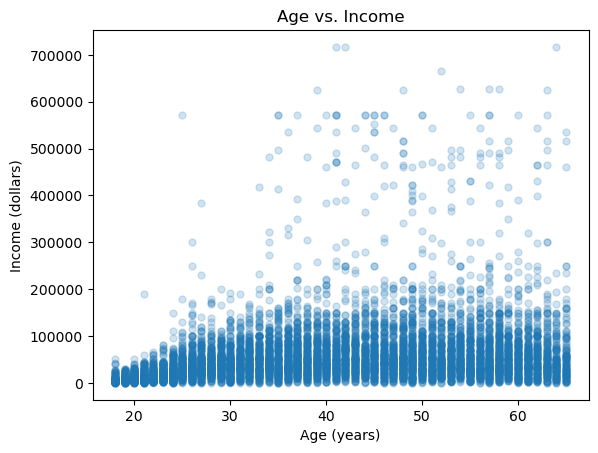

In [31]:
plt.scatter(acs_data['AGE'], acs_data['INCWAGE'], alpha=0.2, s=25) 
# alpha = blending value, between 0 (transparent) and 1 (opaque)
# s = size of the marker points
plt.title('Age vs. Income')
plt.xlabel('Age (years)')
plt.ylabel('Income (dollars)')

### On the graph of age vs. income, include a linear fit line specific to individuals who are married. 

1. Prepare the linear fit line

In [32]:
from sklearn.linear_model import LinearRegression as lm

#subset married individuals only from the acs_data
acs_married_data = acs_data[acs_data['MAR'] == 1]

#fit the linear regression prediction of age vs. income for individuals who are married
y = acs_married_data[['INCWAGE']].values
X = acs_married_data[['AGE' ]].values
y_pred = lm().fit(X, y).predict(X)

2. Plot

Text(0, 0.5, 'Income (dollars)')

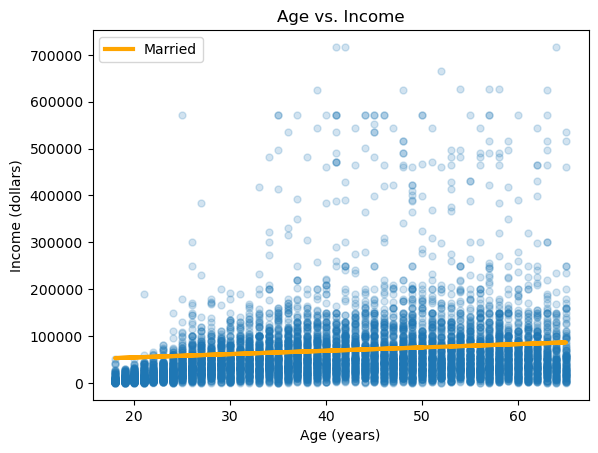

In [33]:
# scatterplot of age vs. income
plt.scatter(acs_data['AGE'], acs_data['INCWAGE'], alpha=0.2, s=25) 
# linear fit line
plt.plot(X, y_pred, color= "orange", linewidth=3, label = "Married")

plt.title('Age vs. Income')
plt.legend()
plt.xlabel('Age (years)')
plt.ylabel('Income (dollars)')

## Regressing income only on age and martial status

In [34]:
import statsmodels.formula.api as smf
result = smf.ols('INCWAGE ~ AGE + MAR', data = acs_data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                INCWAGE   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     338.1
Date:                Sat, 20 Jan 2024   Prob (F-statistic):          3.29e-142
Time:                        13:27:27   Log-Likelihood:            -1.1021e+05
No. Observations:                8800   AIC:                         2.204e+05
Df Residuals:                    8797   BIC:                         2.204e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.172e+04   2335.360      5.018      0.0

#### Discussion Questions:  
(a) What fraction of the variation in wages does the model explain?  
(b) What is the marginal difference in income for being one year older? Is this statistically significant? Is it practically significant? Briefly explain.  
(e) Interpret the coefficient on marital status and its significance.  

## Predictions

As an example, what does our model predict the income for a 40-year old, married individual will be? 

In [35]:
# subsetting the data for 40-year-old married individuals only
dat = acs_data.loc[
    (acs_data['MAR'] == 1) & (acs_data['AGE'] == 40)
]

In [36]:
# Expectation for a 40-year-old married individual 
predictions = result.get_prediction(dat)

predictions.summary_frame(alpha=0.05)[:1]
# alpha : significance level for the confidence interval.
# Fix alpha to 0.05 so that the confidence interval should have 95% coverage.

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,67956.884241,1004.126899,65988.560865,69925.207617,-62412.19575,198325.964232


#### How do you think the model could be improved? Try fitting some different models and report the results of the model that best predicts wages that you can come up with. Use adjusted R2 as your measure of the model that produces the best prediction.

In [37]:
result2 = smf.ols(
    'INCWAGE_log ~ AGE + MAR + SEX + EDUCDC + BLACK + EDUCDC:SEX', 
    data = acs_data).fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:            INCWAGE_log   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     523.1
Date:                Sat, 20 Jan 2024   Prob (F-statistic):               0.00
Time:                        13:27:27   Log-Likelihood:                -11985.
No. Observations:                8800   AIC:                         2.398e+04
Df Residuals:                    8793   BIC:                         2.403e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.8551      0.161     54.928      0.0